In [1]:
%reset
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(1)


Discrete random variables
In the excercise you can use a build in procedure for generating
random numbers. Compare the results obtained in simulations with
expected results. Use histograms (and tests).
1. Choose a value for the probability parameter p in the geometric
distribution and simulate 10,000 outcomes. You can experiment
with a small, moderate and large value if you like.
2. Simulate the 6 point distribution with
X 1 2 3 4 5 6
pi 7/48 5/48 1/8 1/16 1/4 5/16
(a) by applying a direct (crude) method

(b) by using the the rejction method
(c) by using the Alias method
3. Compare the three different methods using adequate criteria,
then discuss the results.
4. Give recommendations of how to choose the best suited
method in different settings, i.e., discuss the advantages and
drawbacks of each method. If time permits substantiate by
running experiments.

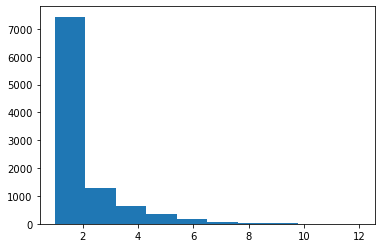

In [2]:
#generate numbers with chosen p: 
p = 0.5
sample_size = 10000
r = np.random.geometric(p,sample_size)

(n,bins,patches) = plt.hist(r,bins =10)

In [3]:
# Testing with chi^2 test: 

classes = np.shape(bins)[0]-1

chi =0
for i in range(1,classes+1):
    n_expected = (1-p)**(i-1)*p * sample_size
    chi = chi+((n[i-1]-n_expected)**2)/n_expected

print(chi)



2371.955775


In [4]:
# simulate the 6 datapoints: 
X = [i for i in range(1,7)]
p = [7/48,5/48,1/8,1/16,1/4,5/16]

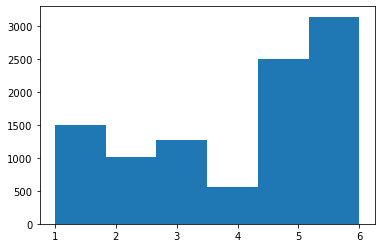

In [5]:
#simulate uniform distribution:

interval=np.zeros(6)
interval[0]=p[0]
for i in range(1,6):
    interval[i] = p[i]+interval[i-1]

uni = np.random.uniform(0,1,sample_size)
for i in range (sample_size):
    for j in range(6):
        if uni[i]<interval[j]:
            uni[i]=j+1
(n,bins,patches)=plt.hist(uni,bins=6)

In [6]:
# Testing with chi^2 test for p distribution: 
classes = 6

chi =0
for i in range(1,classes+1):
    n_expected = p[i-1]*sample_size
    chi = chi+((n[i-1]-n_expected)**2)/n_expected
    
print(chi)



9.056445714285708


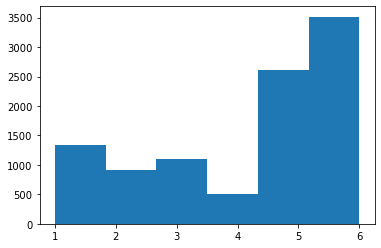

In [7]:
# Rejection method: 

U1 = np.random.uniform(0,1,sample_size)
U2 = np.random.uniform(0,1,sample_size)
q = []
num =[]
for i in range(len(p)):
    q.append(1-p[i])
    num.append(p[i]/q[i])
max(num)
c=0.45
acc = 0
V=[]
while acc <sample_size:
    x = np.random.uniform(0,1)
    y= np.random.uniform(0,1)
    for i in range(len(q)):
        if y<p[i]/(c*q[i]):
            acc =acc +1
            V.append(i+1)
(n,bins,patches)=plt.hist(V,bins=6)


In [8]:
#Chi i anden test for forigående generator:
# # Testing with chi^2 test for p distribution: 
classes = 6

chi =0
for i in range(1,classes+1):
    n_expected = p[i-1]*sample_size
    chi = chi+((n[i-1]-n_expected)**2)/n_expected
    
print(chi)

 

116.28620571428576


(array([1461., 1034., 1231.,  613., 2504., 3157.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

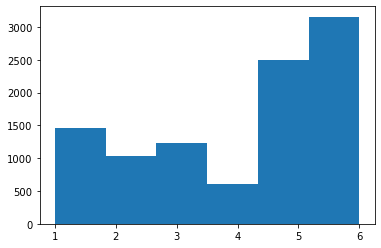

In [15]:
# Alias method: 
p = [7/48,5/48,1/8,1/16,1/4,5/16]
k = len(p)
F = np.zeros(k)
L = np.zeros(k,dtype=np.int16)

s =[]
g =[]
for i,p in enumerate(p):
    F[i] = p*k

    if F[i]>=1:
        g.append(i)
    if F[i] <=1:
        s.append(i)
count =0
while len(s)>0:

    i=g[0]
    j=s[0]

    L[j]=i
    F[i]=F[i]-(1-F[j])
    
    if F[i] < 1:
        s.append(i)
    else:
        g.append(i)
        
    s.pop(0)
    g.pop(0)
    count=count+1
rand = []
for i in range(sample_size):
    U1 = np.random.uniform(0,1)
    U2 = np.random.uniform(0,1)
    I = int(np.floor(U1*k))
    if U2 <=F[I]:
        rand.append(I+1)
    else:
        rand.append(L[I]+1)

plt.hist(rand,bins=6)


In [19]:
# CHI i anden test for Alias method: 
#Chi i anden test for forigående generator:
# # Testing with chi^2 test for p distribution: 
p = [7/48,5/48,1/8,1/16,1/4,5/16]

classes = np.shape(bins)[0]-1

chi =0
for i in range(1,classes+1):
    n_expected = p[i-1]*sample_size
    chi = chi+((n[i-1]-n_expected)**2)/n_expected
    
print(chi)

 

116.28620571428576


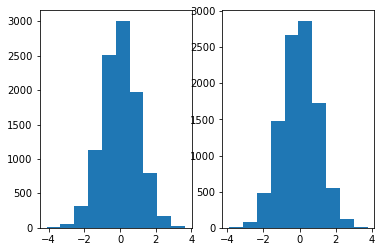

In [18]:
# generate simulated values for each distribution:

## Normal distribution using box-muller

U1 = np.random.uniform(0,1,sample_size)
U2 = np.random.uniform(0,1,sample_size)
R = np.sqrt(-2 * np.log(U1))
theta = 2 * np.pi * U2

X = R * np.cos(theta)
Y = R * np.sin(theta)

fig,(ax1,ax2) = plt.subplots(1,2)
hist = ax1.hist(X)
hist = ax2.hist(Y)
plt.show()

(array([5.589e+03, 2.514e+03, 1.090e+03, 4.530e+02, 2.040e+02, 8.900e+01,
        3.500e+01, 1.600e+01, 5.000e+00, 5.000e+00]),
 array([1.69900564e-04, 2.08799678e+00, 4.17582365e+00, 6.26365053e+00,
        8.35147740e+00, 1.04393043e+01, 1.25271312e+01, 1.46149580e+01,
        1.67027849e+01, 1.87906118e+01, 2.08784387e+01]),
 <BarContainer object of 10 artists>)

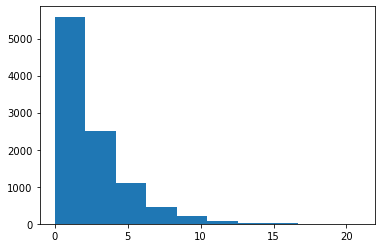

In [11]:
#Exponential distribution 
U1 = np.random.uniform(0,1,sample_size)
lamb = 0.4
X = -np.log(U1)/lamb

plt.hist(X)